# PART 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# a. Load diabetes dataset from sklearn
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [5]:
X_shape = X.shape
print("Shape of X:", X_shape)

Shape of X: (442, 10)


In [6]:
y_shape = y.shape
print("Shape of y:", y_shape)

Shape of y: (442,)


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled.shape

(442, 10)

In [9]:
X_scaled

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

In [10]:
import numpy as np

# Check for null values in each row of X_scaled
null_rows = np.isnan(X_scaled).any(axis=1)

# Print the indices of rows with null values
rows_with_null = np.where(null_rows)[0]
print("Indices of rows with null values:", rows_with_null)

Indices of rows with null values: []


In [16]:
# c. Data splitting: Split data as 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

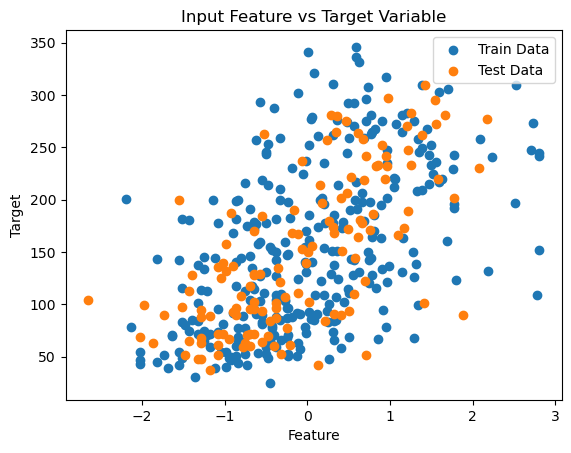

In [72]:
# d. Select a single input feature. Plot input feature against target variable
feature_index = 8  # For example, let's choose the third feature
X_train_single_feature = X_train[:, feature_index].reshape(-1, 1)
X_test_single_feature = X_test[:, feature_index].reshape(-1, 1)

plt.scatter(X_train_single_feature, y_train, label='Train Data')
plt.scatter(X_test_single_feature, y_test, label='Test Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Input Feature vs Target Variable')
plt.legend()
plt.show()

In [73]:
# e. Write functions for computing cost, gradients, and gradient descent algorithm
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def compute_gradients(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    gradients = (1 / m) * X.T.dot(predictions - y)
    return gradients

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        gradients = compute_gradients(X, y, theta)
        theta = theta - learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

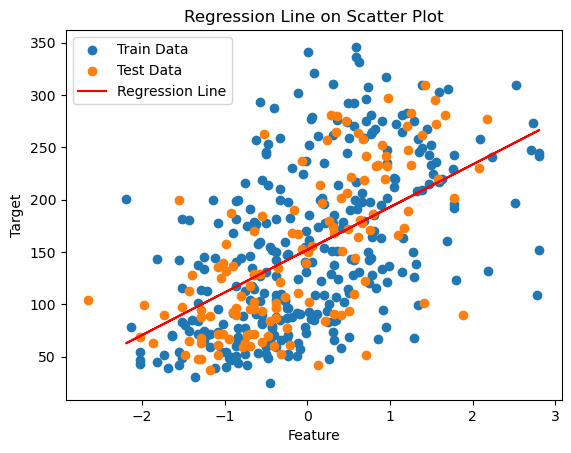

In [74]:
# f. Plot regression line on scatter plot of feature vs target
learning_rate = 0.01
iterations = 1000
theta = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X_train_single_feature), 1)), X_train_single_feature]
theta, cost_history = gradient_descent(X_b, y_train.reshape(-1, 1), theta, learning_rate, iterations)

plt.scatter(X_train_single_feature, y_train, label='Train Data')
plt.scatter(X_test_single_feature, y_test, label='Test Data')
plt.plot(X_train_single_feature, X_b.dot(theta), color='red', label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Regression Line on Scatter Plot')
plt.legend()
plt.show()

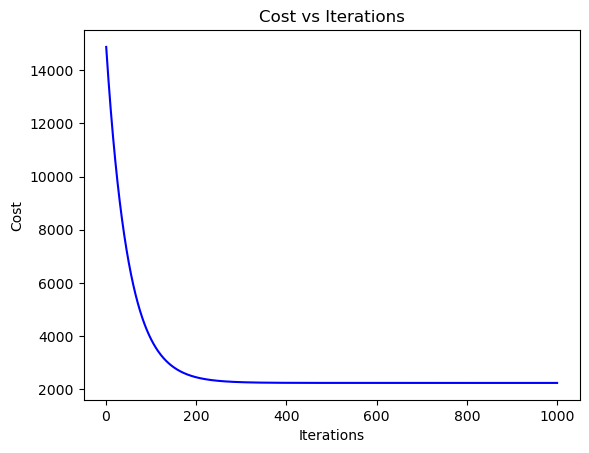

In [75]:
# g. Plot cost vs #iterations
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


In [76]:
# h. Report parameter values, training error, test error, and model accuracy
X_b_test = np.c_[np.ones((len(X_test_single_feature), 1)), X_test_single_feature]
predictions_train = X_b.dot(theta)
predictions_test = X_b_test.dot(theta)

training_error = np.sqrt(np.mean((predictions_train - y_train.reshape(-1, 1))**2))
test_error = np.sqrt(np.mean((predictions_test - y_test.reshape(-1, 1))**2))
accuracy = 1 - (test_error / np.mean(y_test))

print("Parameter Values (Theta):", theta)
print("Training Error:", training_error)
print("Test Error:", test_error)
print("Model Accuracy:", accuracy)

Parameter Values (Theta): [[152.25216601]
 [ 40.71886923]]
Training Error: 66.83793203645763
Test Error: 55.17694005709732
Model Accuracy: 0.6272396491291745


# PART 2

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [93]:
df=pd.read_csv('winequality-white.csv',delimiter=';')

In [94]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [95]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [96]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [97]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['quality'])) 
y = df['quality']

In [98]:
X

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [99]:
X.shape

(4898, 11)

In [100]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [101]:
y.shape

(4898,)

In [102]:
from sklearn.feature_selection import SelectKBest, f_regression

# Perform feature selection using SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Fit the linear regression model with selected features
model.fit(X_train_selected, y_train)

# Predict the target variable for the test data using selected features
y_pred_train_selected = model.predict(X_train_selected)
y_pred_test_selected = model.predict(X_test_selected)

# Calculate training and test errors using selected features
train_error_selected = mean_squared_error(y_train, y_pred_train_selected)
test_error_selected = mean_squared_error(y_test, y_pred_test_selected)

# Calculate R^2 score using selected features
r2_train_selected = r2_score(y_train, y_pred_train_selected)
r2_test_selected = r2_score(y_test, y_pred_test_selected)

# Print the results
print("Training Error (MSE) with feature selection:", train_error_selected)
print("Test Error (MSE) with feature selection:", test_error_selected)
print("Training R^2 Score with feature selection:", r2_train_selected)
print("Test R^2 Score with feature selection:", r2_test_selected)

# Print the selected feature indices
selected_feature_indices = selector.get_support(indices=True)
selected_features = df.columns[selected_feature_indices]
print("Selected Features:", selected_features)


Training Error (MSE) with feature selection: 3100.5569744371624
Test Error (MSE) with feature selection: 2878.4418737283386
Training R^2 Score with feature selection: 0.49570350594643964
Test R^2 Score with feature selection: 0.4667881119985007
Selected Features: Index(['citric acid', 'residual sugar', 'total sulfur dioxide', 'density',
       'pH'],
      dtype='object')


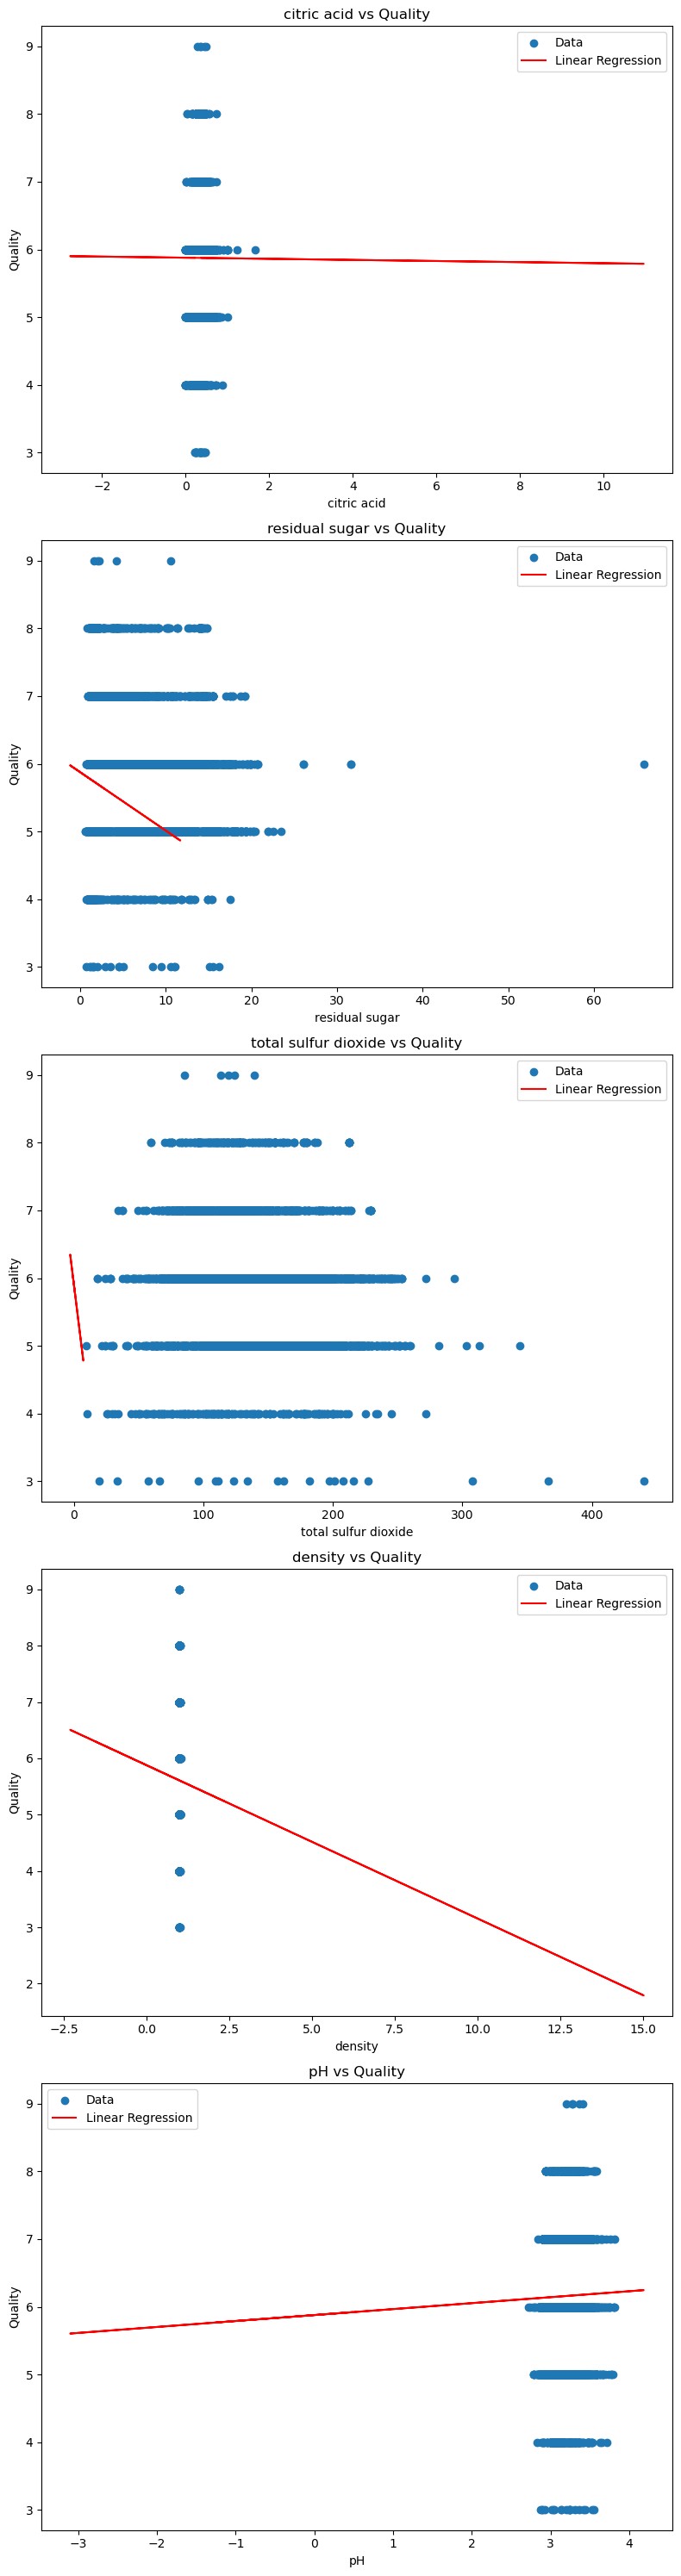

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Get the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = df.columns[selected_feature_indices]

# Plot scatter plots for each selected feature against the target variable
fig, axs = plt.subplots(len(selected_features), figsize=(8, 6*len(selected_features)))
for i, feature in enumerate(selected_features):
    axs[i].scatter(df[feature], df['quality'], label='Data')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Quality')
    axs[i].set_title('{} vs Quality'.format(feature))

    # Fit linear regression model to the selected feature
    feature_idx = np.where(df.columns == feature)[0][0]
    X_selected_feature = X[:, feature_idx].reshape(-1, 1)
    model.fit(X_selected_feature, y)
    y_pred = model.predict(X_selected_feature)

    # Plot the linear regression line
    axs[i].plot(X_selected_feature, y_pred, color='red', label='Linear Regression')
    axs[i].legend()

plt.tight_layout()
plt.show()
